<a href="https://colab.research.google.com/github/Ahmadtito17/PCVK_Ganjil_2023/blob/main/UAS_PCVK_Kelompok_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **UAS Pengolahan Citra dan Visi Komputer**
***
**Anggota Kelompok :**

1. AHMAD TITO NUR HENDRAWAN / 2141720265

2. FERGIE FATAH ARDIANSYAH / 2141720211

3. MUTIARA DEVITA EKA PUTRI / 2141720135

***


# **Import Library**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# **Load Dataset MNIST**

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [6]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [7]:
# Check the label
train_labels.shape

(60000,)

# **Combine Train dan Test Data**

In [8]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [10]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 9')

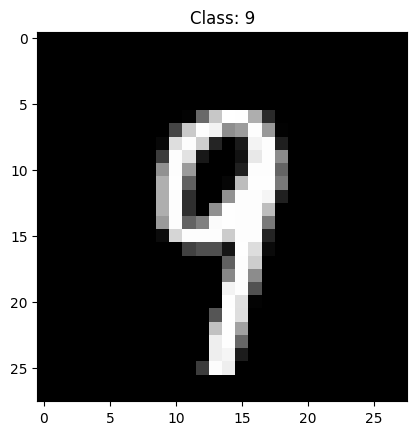

In [11]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

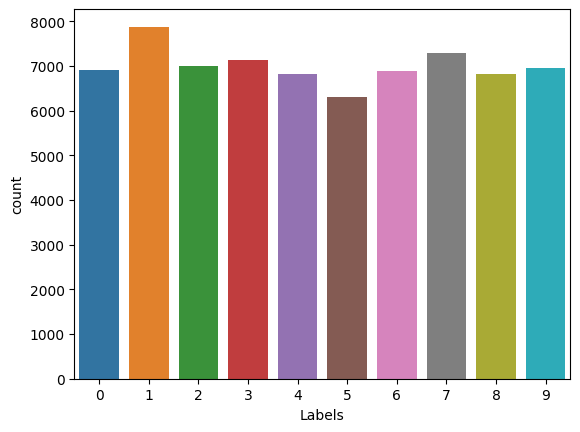

In [12]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

# **Load Kaggle A-Z**

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-13 01:41:23--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   123MB/s    in 1.5s    

2023-12-13 01:41:24 (123 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [15]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
...       ...    ...    ...    ...    ...    ...    ...    ...  
372445    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372446    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372447    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372448    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372449    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[372450 rows x 785 columns]

In [16]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [17]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [18]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [19]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 18.0')

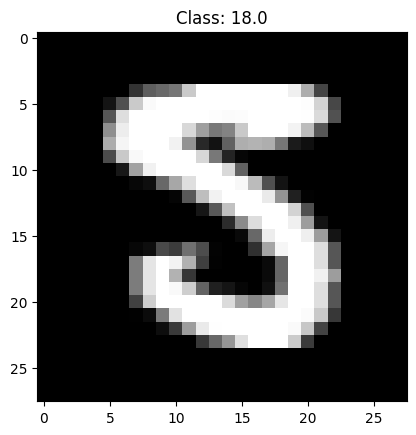

In [20]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

<Axes: xlabel='Labels', ylabel='count'>

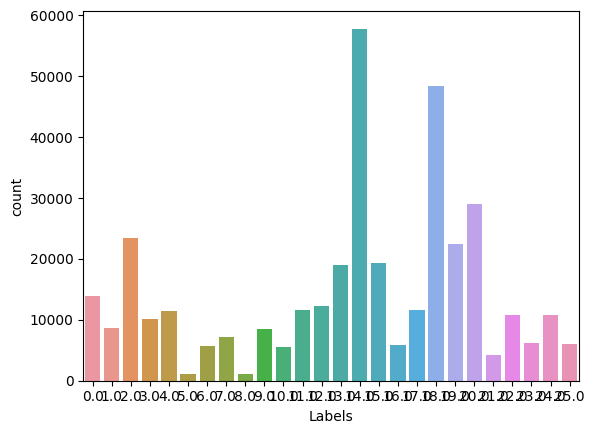

In [21]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

# **Combine Dataset (MNIST + Kaggle A-Z)**

In [22]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [25]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [27]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [28]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# **Preprocessing**

In [31]:
# Normalize data
data /= 255.0

In [32]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

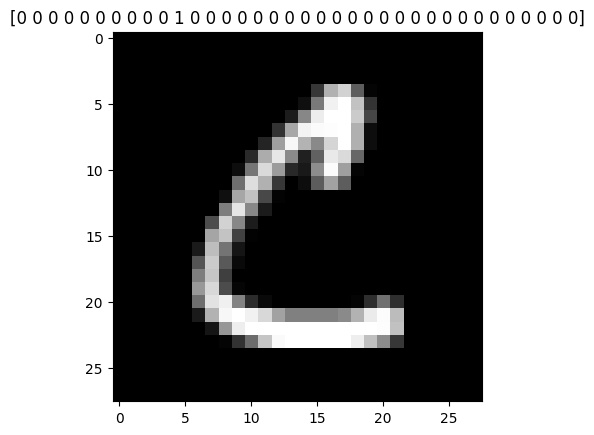

In [35]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
classes_total.max()

57825

In [38]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# **Split Data to Train and Test**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

# **Create Data Augmentation**

In [40]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# **Build CNN Model**

In [42]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [46]:
import joblib

joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [47]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# **Train Model**

In [51]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 5
batch_size = 128

In [52]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [53]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/5
2765/2765 [==============================] - ETA: 0s - loss: 0.8753 - accuracy: 0.9089
Epoch 1: val_loss improved from inf to 0.29265, saving model to custom_ocr.model
2765/2765 [==============================] - 127s 46ms/step - loss: 0.8753 - accuracy: 0.9089 - val_loss: 0.2926 - val_accuracy: 0.8809
Epoch 2/5
2765/2765 [==============================] - ETA: 0s - loss: 0.7621 - accuracy: 0.9178
Epoch 2: val_loss improved from 0.29265 to 0.18640, saving model to custom_ocr.model
2765/2765 [==============================] - 123s 44ms/step - loss: 0.7621 - accuracy: 0.9178 - val_loss: 0.1864 - val_accuracy: 0.9310
Epoch 3/5
2764/2765 [============================>.] - ETA: 0s - loss: 0.6878 - accuracy: 0.9241
Epoch 3: val_loss did not improve from 0.18640
2765/2765 [==============================] - 120s 43ms/step - loss: 0.6877 - accuracy: 0.9241 - val_loss: 0.2718 - val_accuracy: 0.8812
Epoch 4/5
2764/2765 [============================>.] - ETA: 0s - loss: 0.6377 - accuracy

# **Evaluate Model**

**Make Single Prediction**

In [59]:
from keras.models import load_model

# Make predictions using the loaded model
load_network = load_model('custom_ocr.model')
predictions = load_network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [60]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

array([1.19079246e-07, 1.69609507e-10, 1.03182141e-09, 2.30034036e-08,
       3.20178294e-11, 1.01700490e-02, 7.22279992e-07, 2.14341262e-12,
       7.03691470e-08, 3.19902739e-07, 4.64122545e-16, 9.40920453e-10,
       6.05032482e-11, 7.48908047e-09, 1.25157962e-09, 2.05385418e-13,
       5.49183915e-06, 7.89520901e-14, 1.30582420e-11, 9.95442591e-08,
       1.85338832e-12, 8.14361290e-09, 6.73301543e-14, 4.35800566e-13,
       7.36981391e-08, 5.35378589e-17, 2.14394252e-10, 2.11773581e-18,
       9.89823043e-01, 4.39834150e-12, 1.57312063e-09, 2.48113547e-15,
       5.13959604e-11, 5.17732795e-15, 2.43084691e-10, 4.12711559e-13],
      dtype=float32)

In [61]:
# Get the actual prediction -> highest probability
np.argmax(predictions[10])

28

In [62]:
# Check label for 24
name_labels[28]

'S'

In [63]:
# Check y_test label for 0
y_test[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [64]:
# check the highest value
np.argmax(y_test[10])

28

In [65]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[10])]

'S'

# **Make an Evaluation on Test Data**

In [66]:
# Evaluate on test data
load_network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1864 - accuracy: 0.9310


[0.18639661371707916, 0.9310204386711121]

In [67]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.24      0.70      0.36      1381
           1       0.96      0.99      0.98      1575
           2       0.89      0.97      0.93      1398
           3       0.99      0.97      0.98      1428
           4       0.91      0.94      0.92      1365
           5       0.73      0.91      0.81      1263
           6       0.90      0.99      0.94      1375
           7       0.93      0.99      0.96      1459
           8       0.81      0.99      0.89      1365
           9       0.91      0.99      0.94      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.94      0.96      1734
           C       0.99      0.98      0.98      4682
           D       0.90      0.97      0.93      2027
           E       0.99      0.98      0.98      2288
           F       0.94      0.99      0.97       233
           G       0.98      0.90      0.94      1152
           H       0.98    

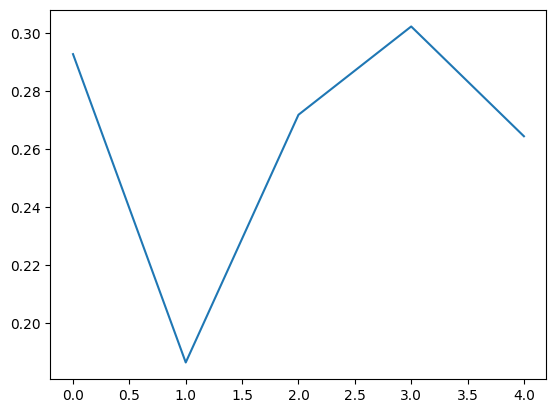

In [68]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [69]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

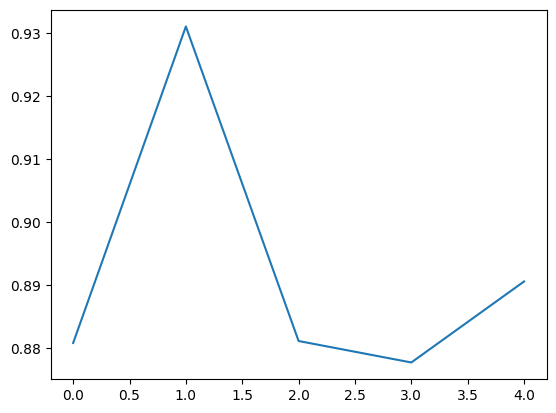

In [70]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# **Save the Model**

In [71]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Testing on Real Image**

In [72]:
# Import library
from tensorflow.keras.models import load_model

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
# Load saved network
load_network = load_model('/content/network')

In [78]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

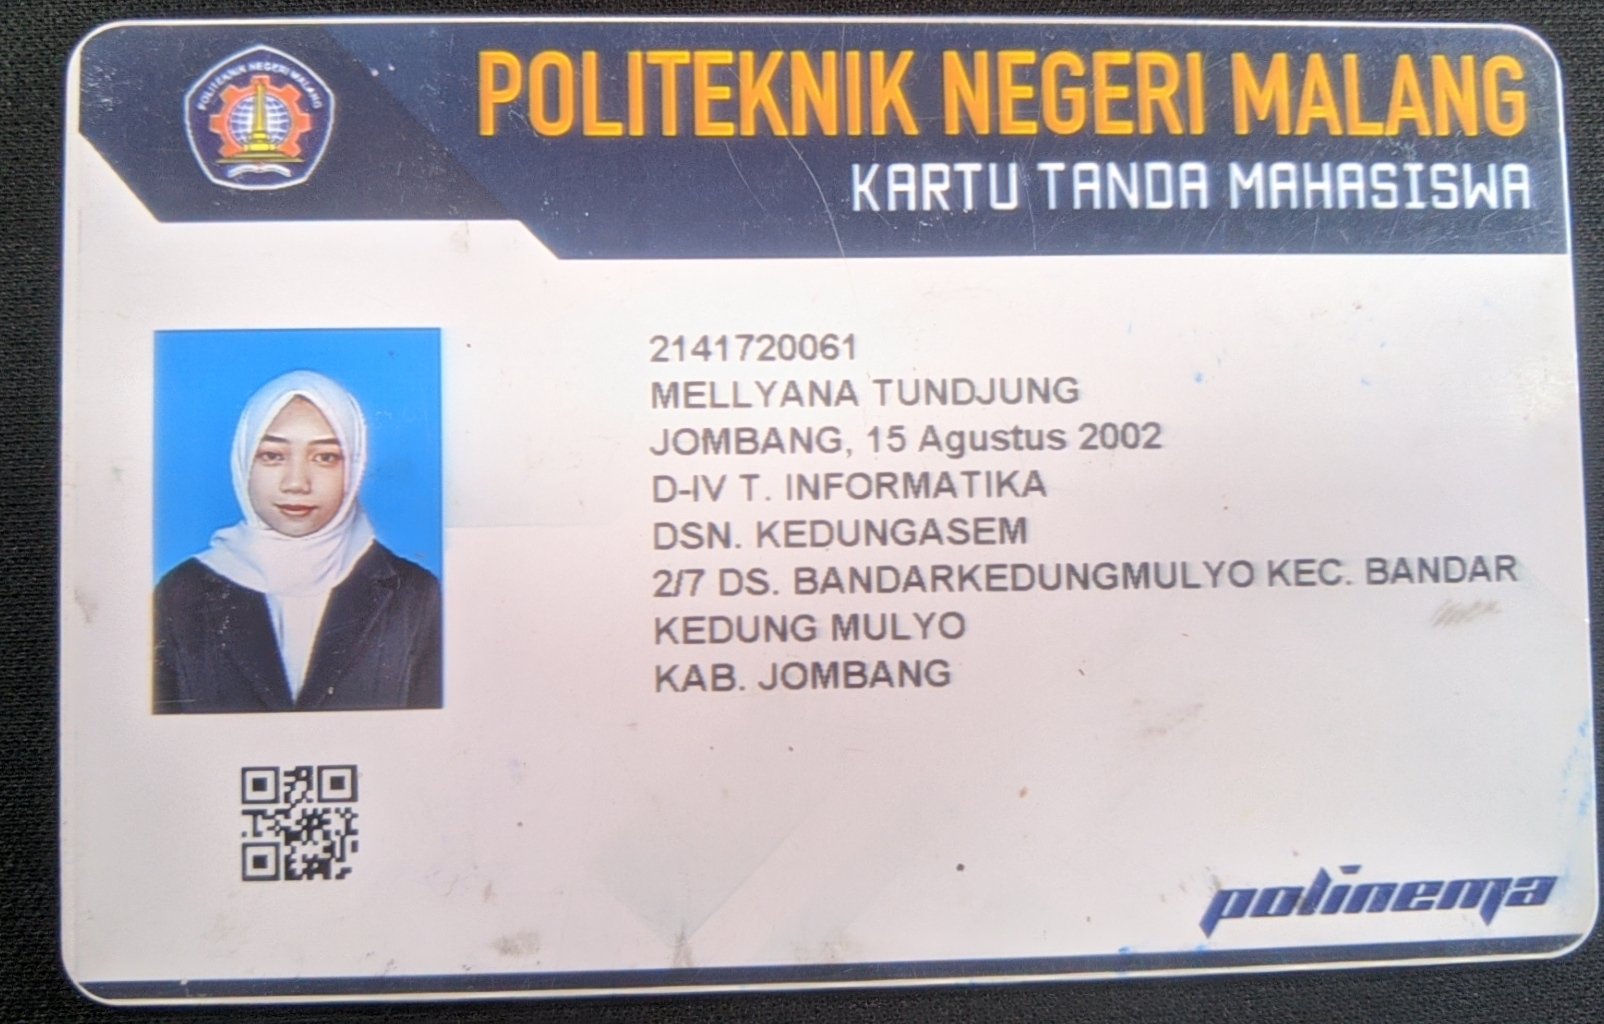

In [80]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/pcvk/Kelompok 5/3B_2141720061_1 - mllyyy.jpg')
cv2_imshow(img)

In [81]:
# Check shape
img.shape

(1024, 1604, 3)

In [82]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(1024, 1604)

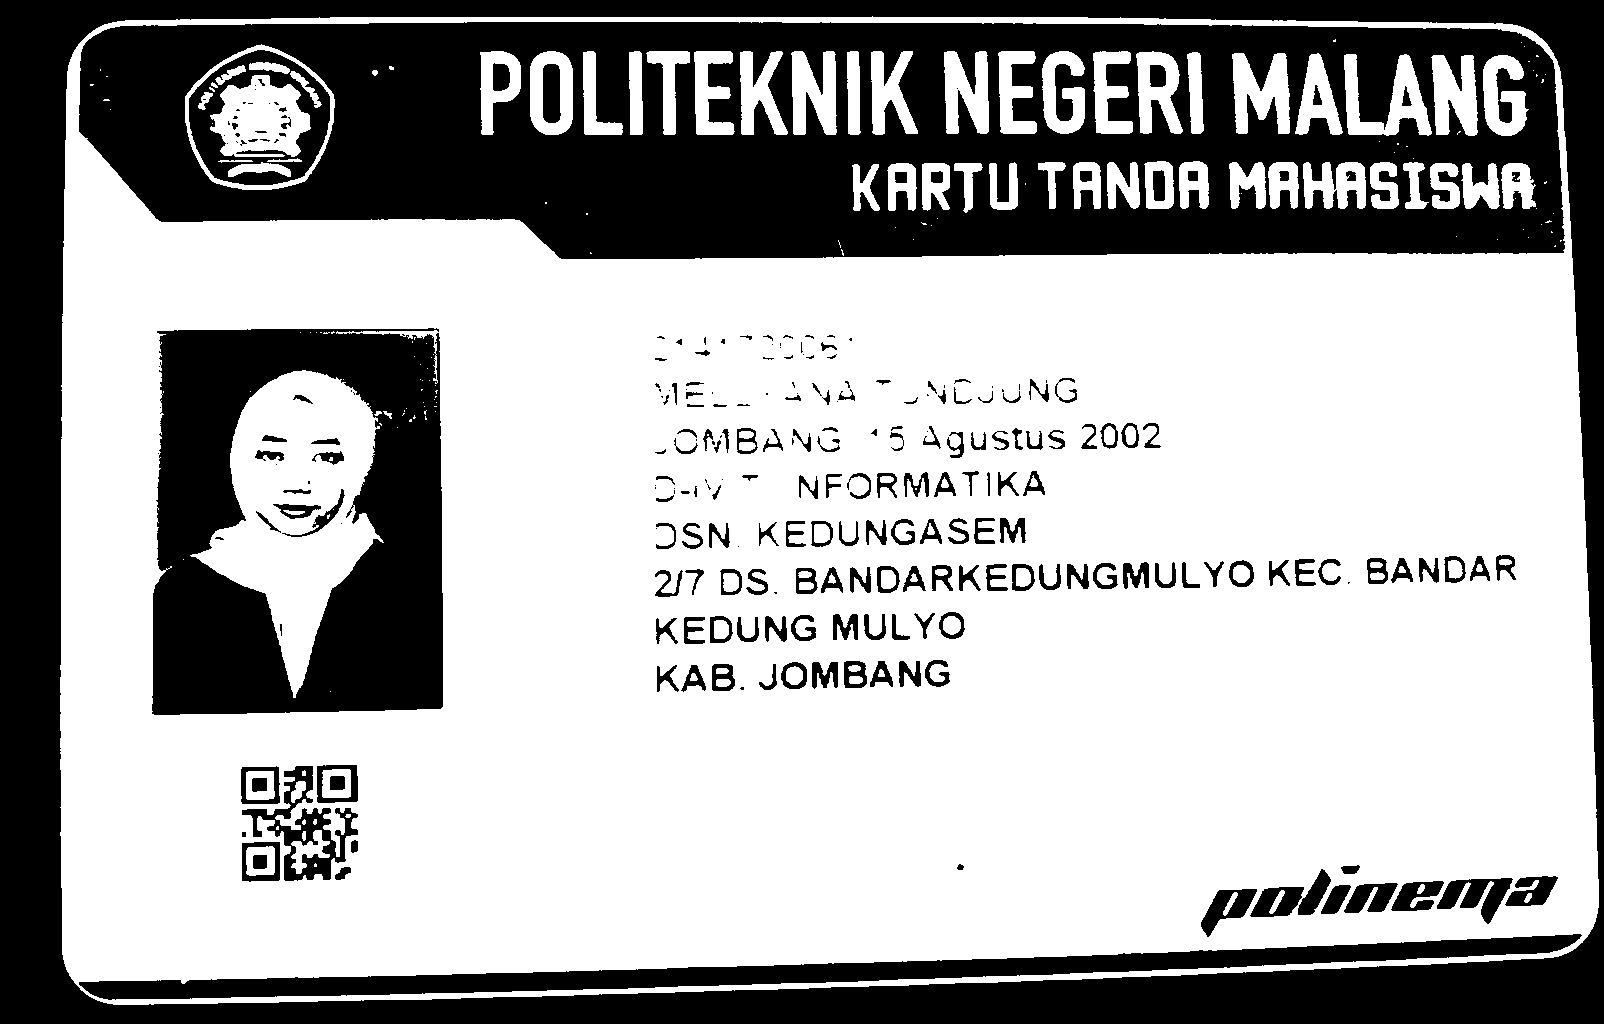

153.0


In [83]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [84]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(thresh, (28,28))
cv2_imshow(img_resize)

In [85]:
img_resize.shape

(28, 28)

In [86]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [87]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [88]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 222ms/step


11

In [89]:
# check label for 6
name_labels[20]

'K'

In [90]:
import numpy as np
import imutils
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

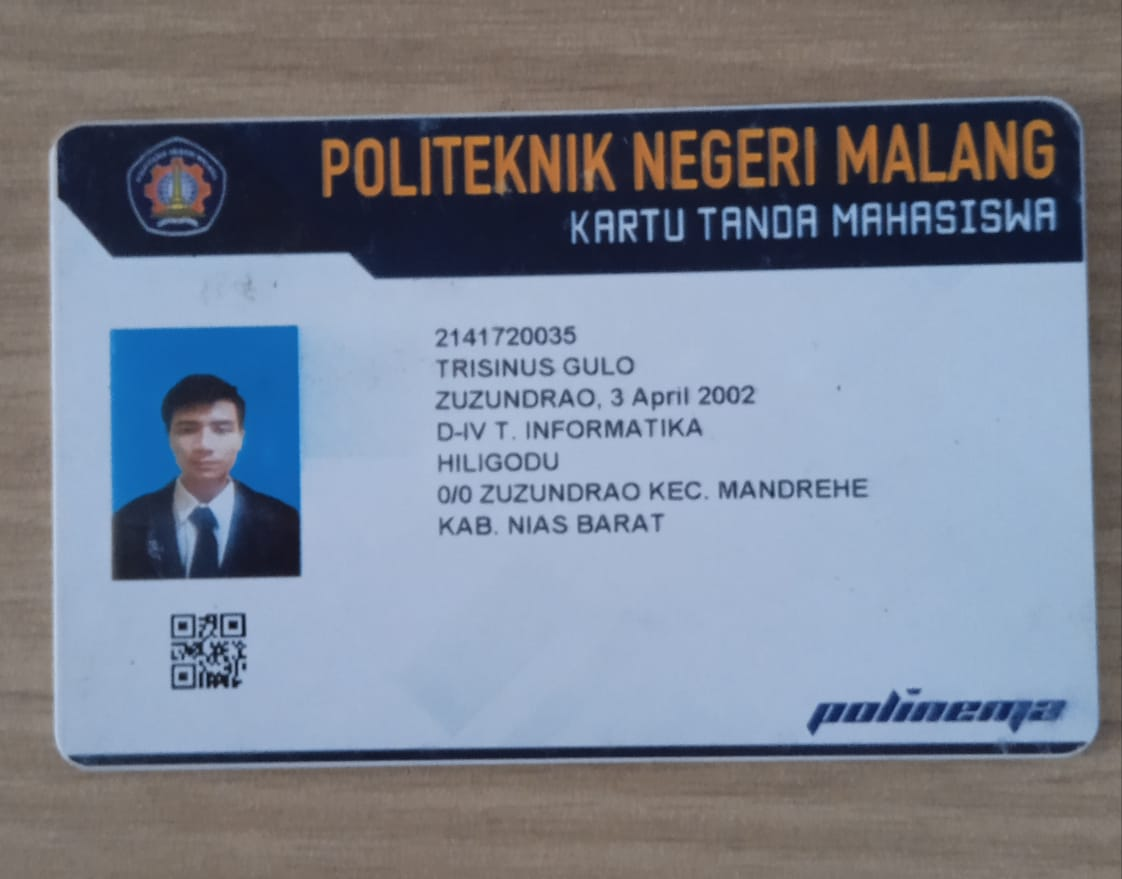

In [91]:
img_real = cv2.imread('/content/drive/MyDrive/pcvk/Kelompok 5/3C_2141720035_1 - Trisinus Gulo.jpeg')
# show image
cv2_imshow(img_real)

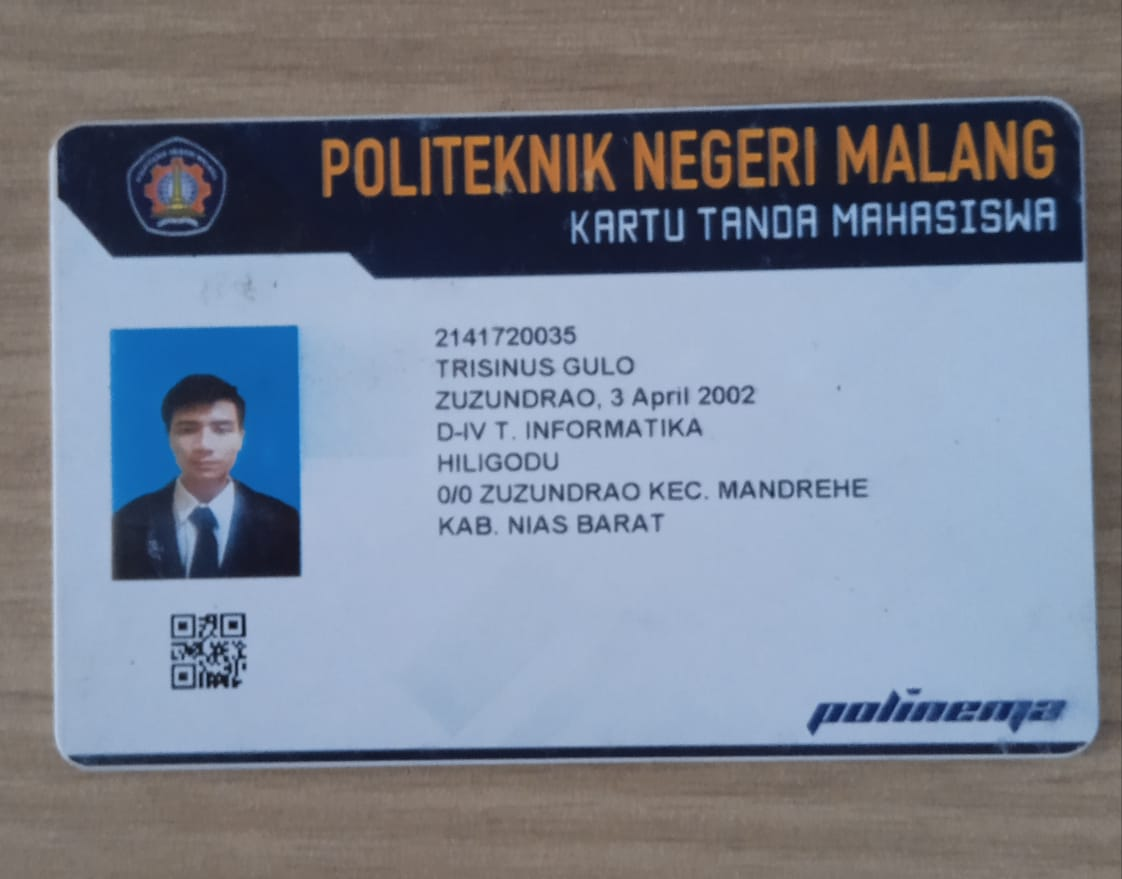

In [92]:
img = cv2.imread('/content/drive/MyDrive/pcvk/Kelompok 5/3C_2141720035_1 - Trisinus Gulo.jpeg')
# show image
cv2_imshow(img)

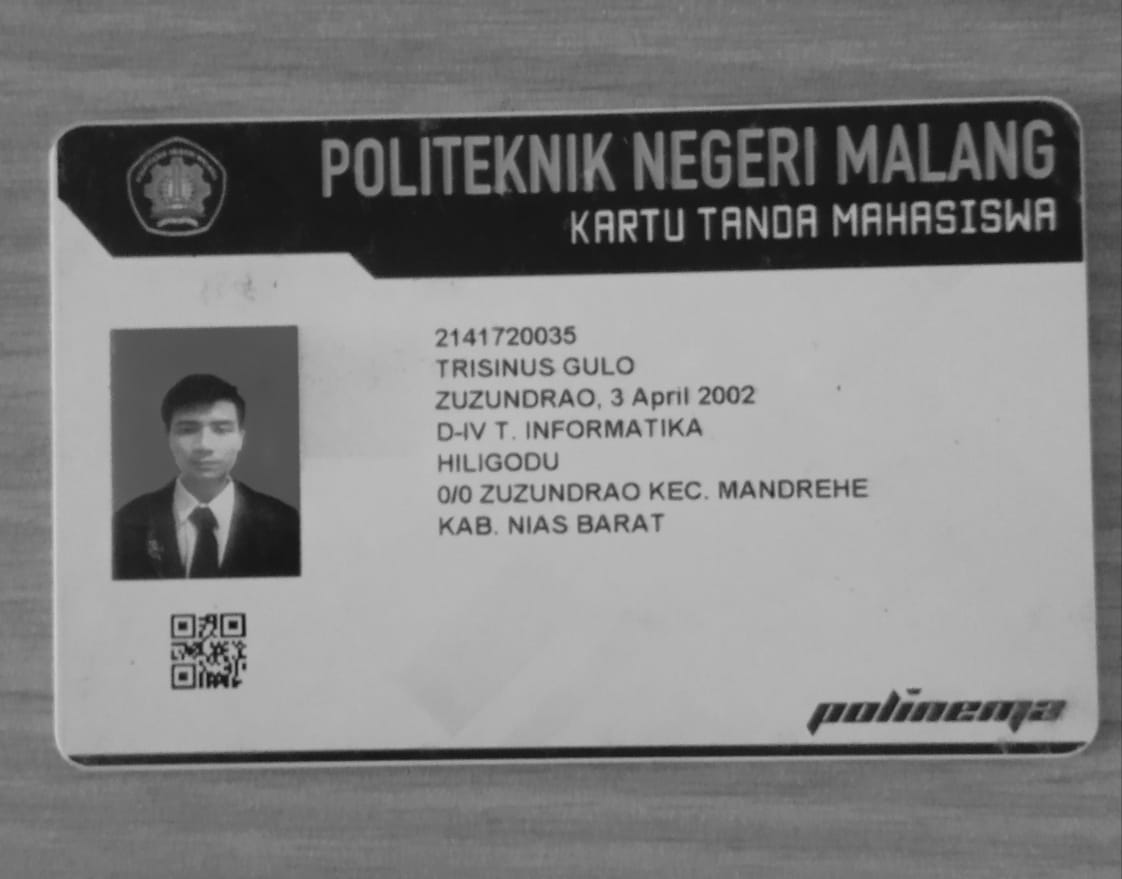

In [93]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show
cv2_imshow(gray)

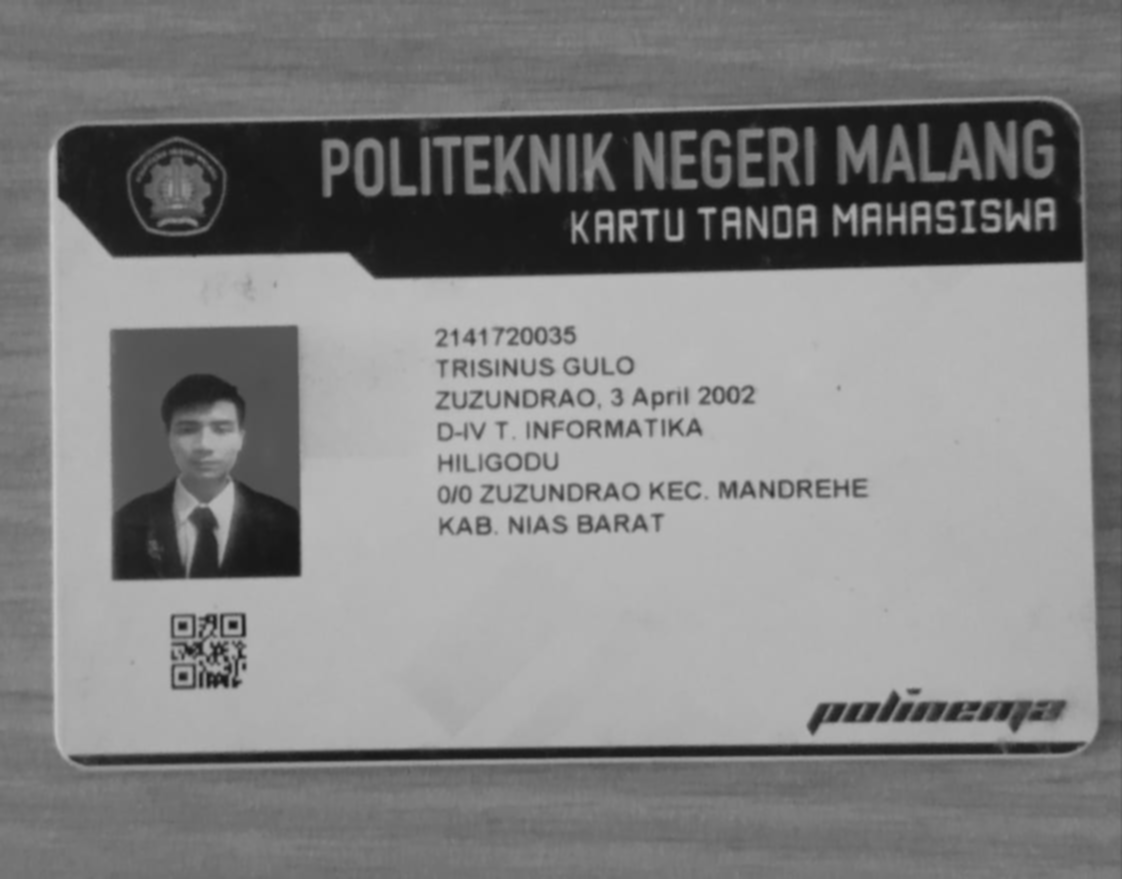

In [94]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
# check
cv2_imshow(blur)

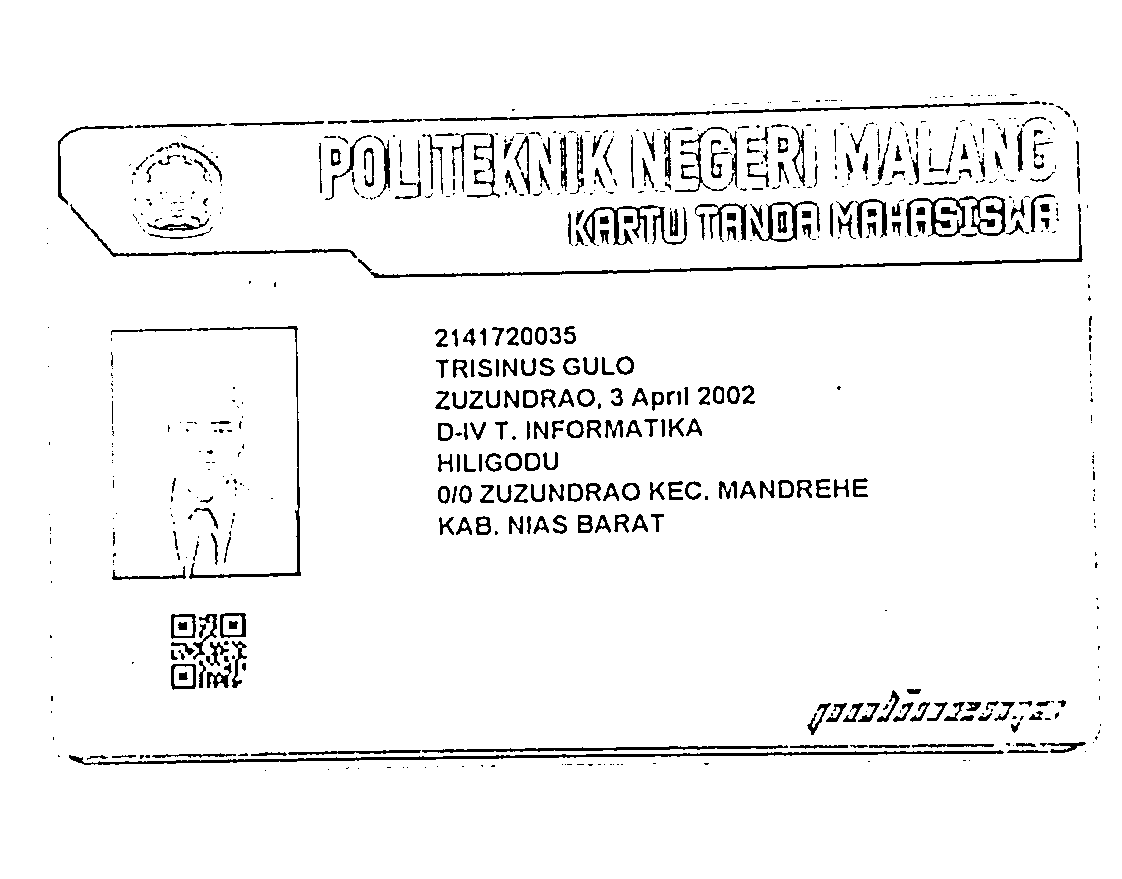

In [95]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
# check
cv2_imshow(adaptive)

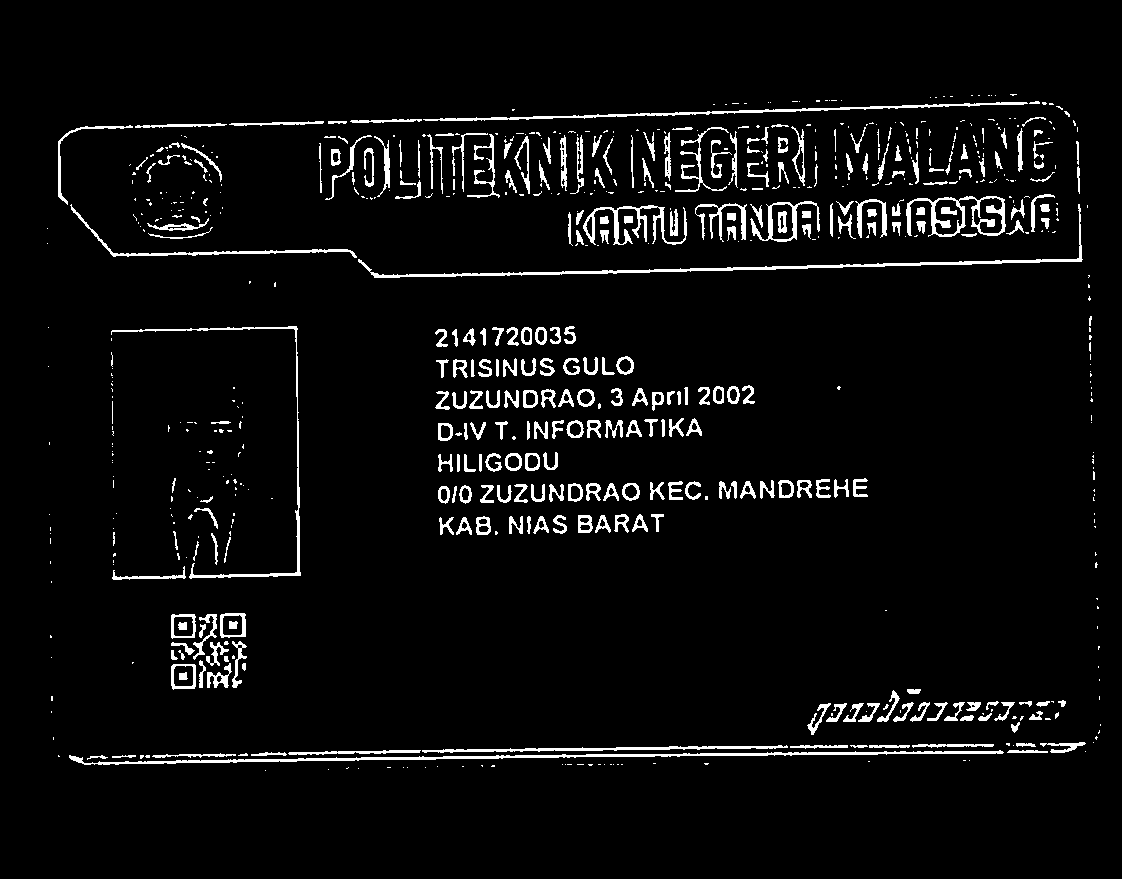

In [96]:
# inverse image since we trained out model
# with black background
invertion = 255 - adaptive
# check
cv2_imshow(invertion)

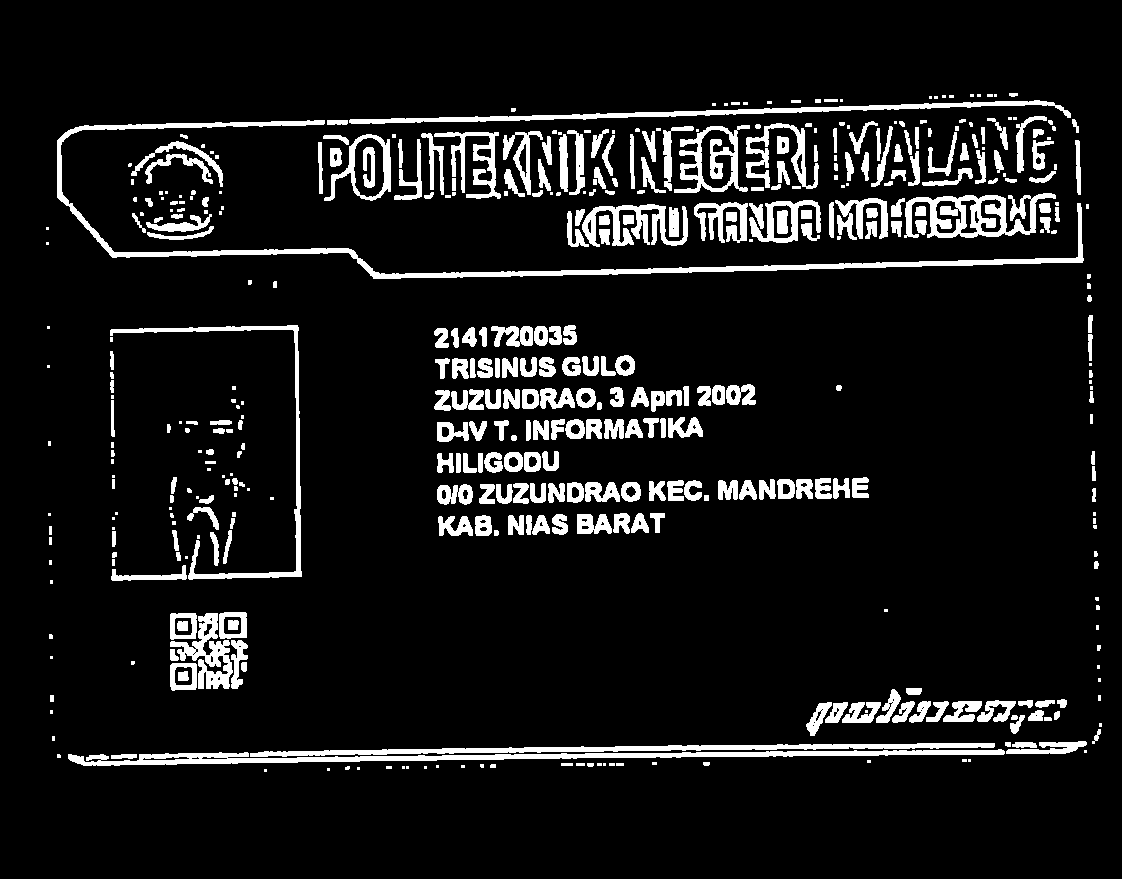

In [97]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
# check
cv2_imshow(dilation)

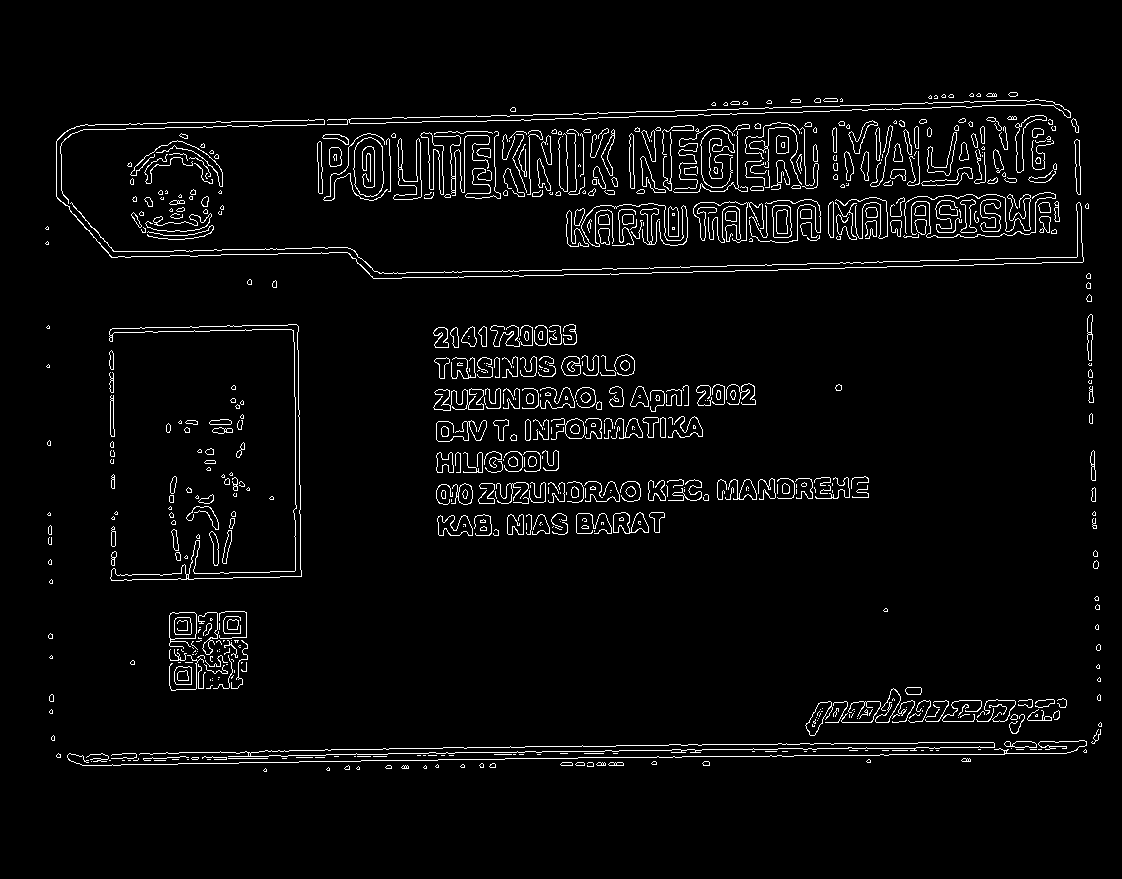

In [98]:
edges = cv2.Canny(dilation, 40, 150)
cv2_imshow(edges)

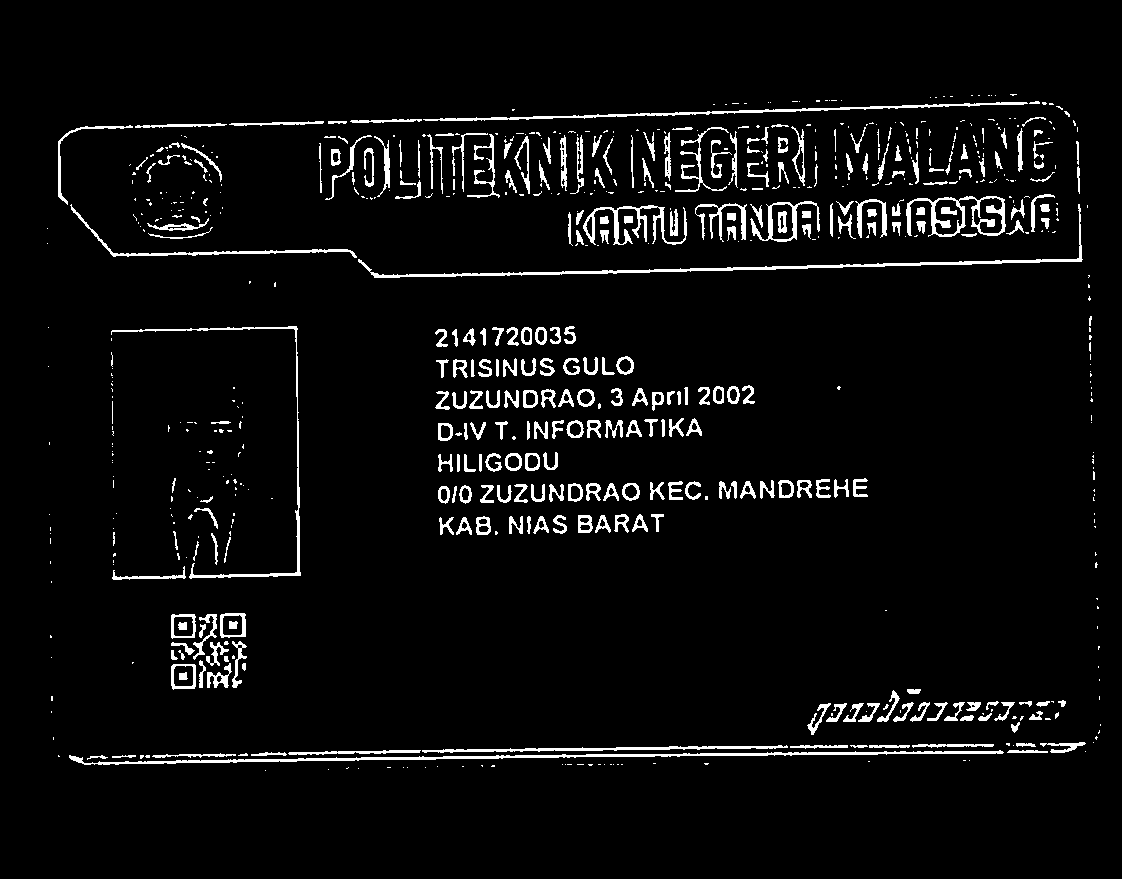

In [99]:
# Test erode
erode = cv2.erode(invertion, np.ones((1,1)))
cv2_imshow(erode)

In [100]:
# Define function for contour detection
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [101]:
conts = find_contours(dilation.copy())

In [102]:
# Check contour value
conts

(array([[[ 46, 242]],
 
        [[ 46, 244]],
 
        [[ 48, 244]],
 
        [[ 48, 242]]], dtype=int32),
 array([[[ 46, 227]],
 
        [[ 46, 229]],
 
        [[ 48, 229]],
 
        [[ 48, 227]]], dtype=int32),
 array([[[ 47, 365]],
 
        [[ 47, 367]],
 
        [[ 49, 367]],
 
        [[ 49, 365]]], dtype=int32),
 array([[[ 47, 326]],
 
        [[ 47, 328]],
 
        [[ 49, 328]],
 
        [[ 49, 326]]], dtype=int32),
 array([[[ 48, 513]],
 
        [[ 48, 515]],
 
        [[ 50, 515]],
 
        [[ 50, 513]]], dtype=int32),
 array([[[ 48, 441]],
 
        [[ 48, 445]],
 
        [[ 50, 445]],
 
        [[ 50, 441]]], dtype=int32),
 array([[[ 49, 634]],
 
        [[ 49, 638]],
 
        [[ 52, 638]],
 
        [[ 52, 635]],
 
        [[ 51, 634]]], dtype=int32),
 array([[[ 49, 560]],
 
        [[ 49, 564]],
 
        [[ 51, 564]],
 
        [[ 51, 560]]], dtype=int32),
 array([[[ 49, 537]],
 
        [[ 49, 544]],
 
        [[ 51, 544]],
 
        [[ 51, 537]]], dtype=int

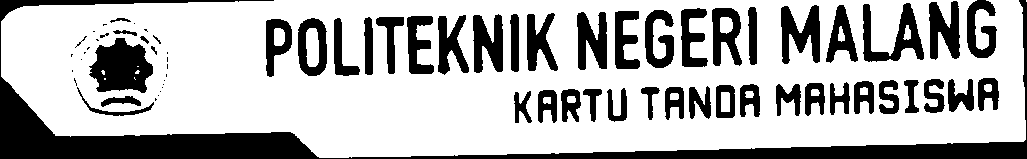

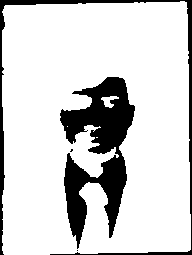

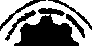

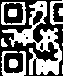

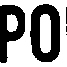

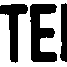

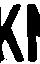

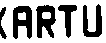

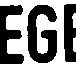

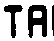

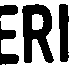

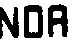

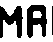

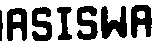

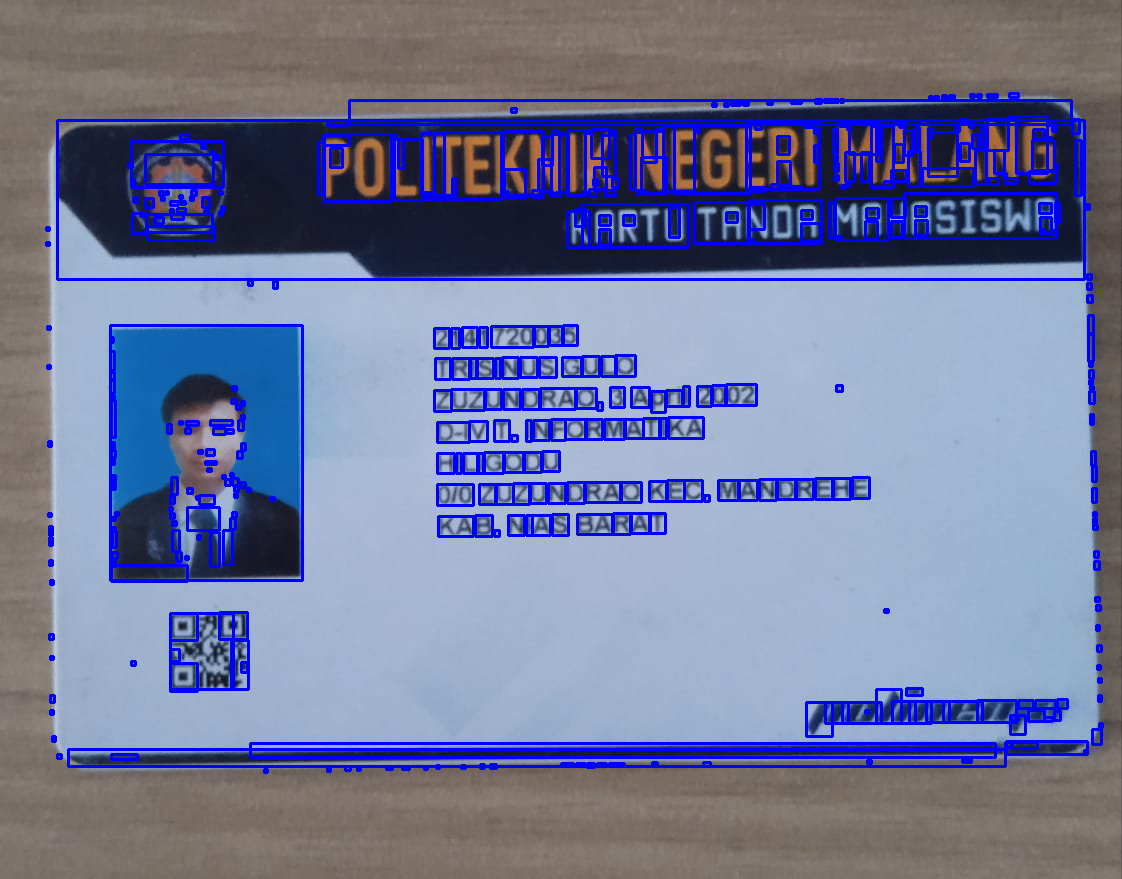

In [103]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 10, 160
min_h, max_h = 14, 140
img_copy = img.copy() # original image for plotting countour result

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  # if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
  roi = gray[y:y+h, x:x+w] # get region of interest for char
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(thresh) # check

  # Build bounding box on original image
  cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

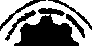

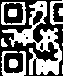

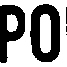

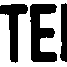

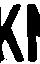

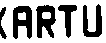

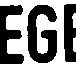

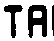

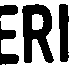

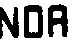

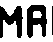

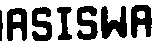

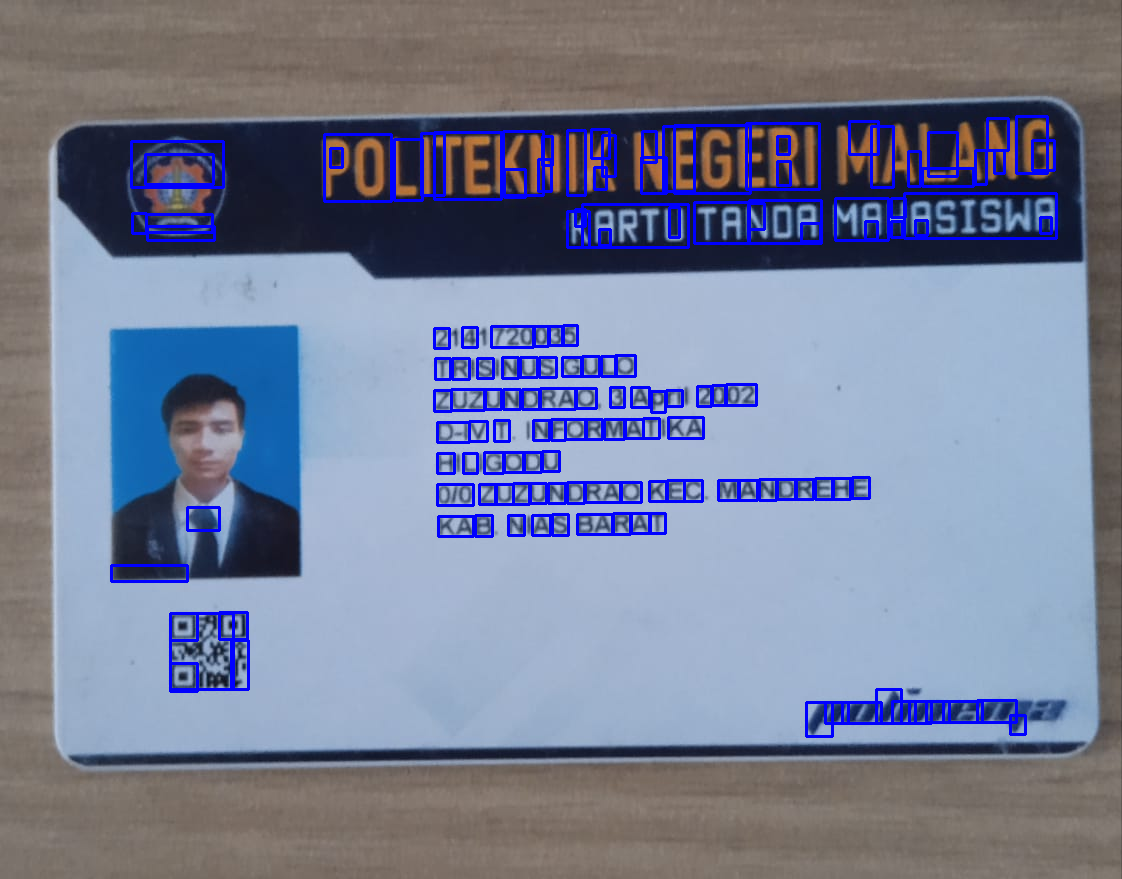

In [104]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 10, 160
min_h, max_h = 14, 140
img_copy = img.copy()

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [105]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

In [106]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

In [107]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [108]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(conts[4])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

In [109]:
# Demo by filled strategy
# (w, h) = test_image.shape
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [110]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [111]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

In [112]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [113]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 10, 160
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [114]:
# check pixel for detected char sample
detected_char[0][0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [115]:
# check bounding box for detected char sample
detected_char[0][1]

(111, 565, 76, 16)

In [116]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [117]:
pixels.shape

(144, 28, 28, 1)

In [118]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [119]:
# Predict
preds = load_network.predict(pixels)

# check shape
preds.shape

5/5 [==============================] - 0s 25ms/step


(144, 36)

In [120]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

T M N M 2 2 G B B U G B N D B 1 Z 2 B T M H H M U R 4 L V B 5 Z G U M T U N N J O N H Z U D D U A H O 1 S M U 1 N 3 F S G 5 0 D U 1 V 0 H U B M R V A I L 1 M 3 A 0 0 A A A N Y T K T P E M E M 1 B C B 2 O M Q A H Y E N D A D R N P E U H G M Y E 8 1 M A U U M 1 U A Z D U G 1 M Y 1 U 6 E Z 

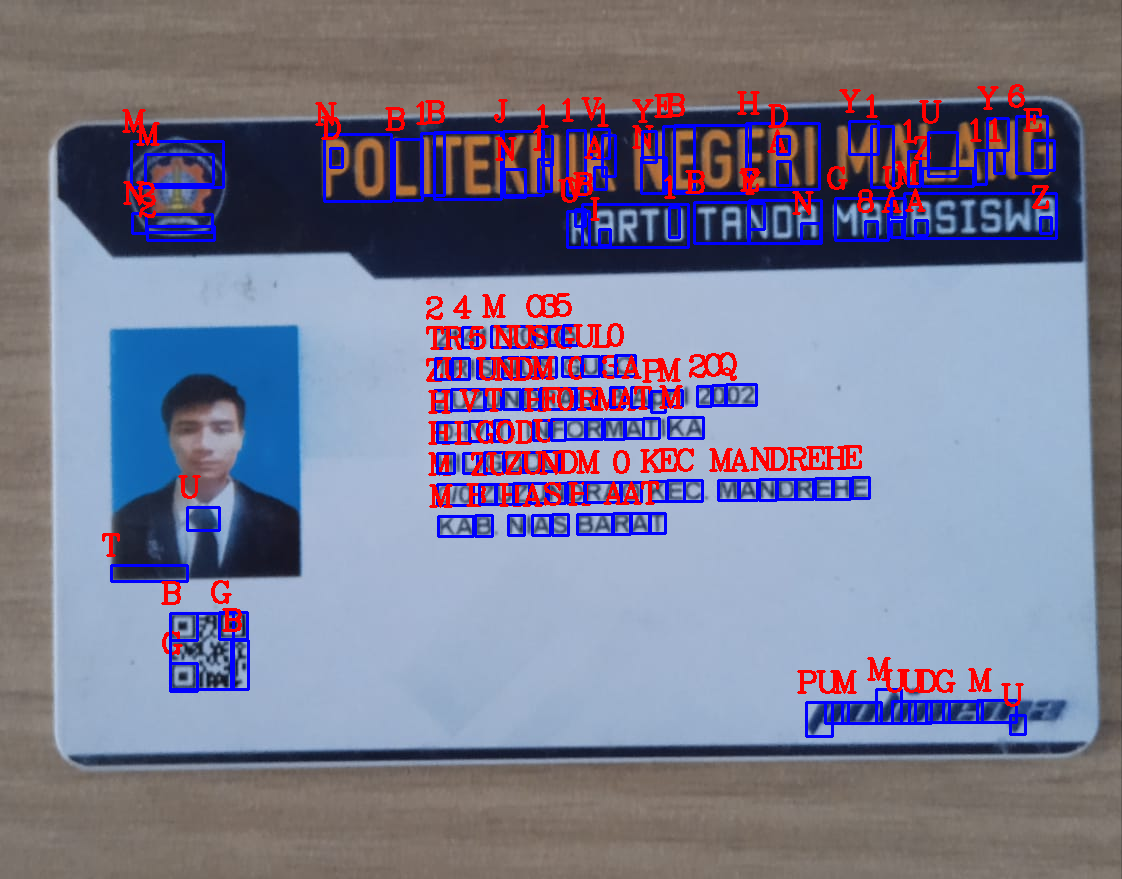

In [121]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

In [122]:
# Redefine roi --> include margin
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

In [123]:
# Perform detection agian
conts2 = find_contours(dilation.copy())

# Detect every single char from contour
detected_char = []

for c in conts2:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 10, 160
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [124]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [125]:
# Predict
preds = load_network.predict(pixels)

# check shape
preds.shape

5/5 [==============================] - 0s 2ms/step


(144, 36)

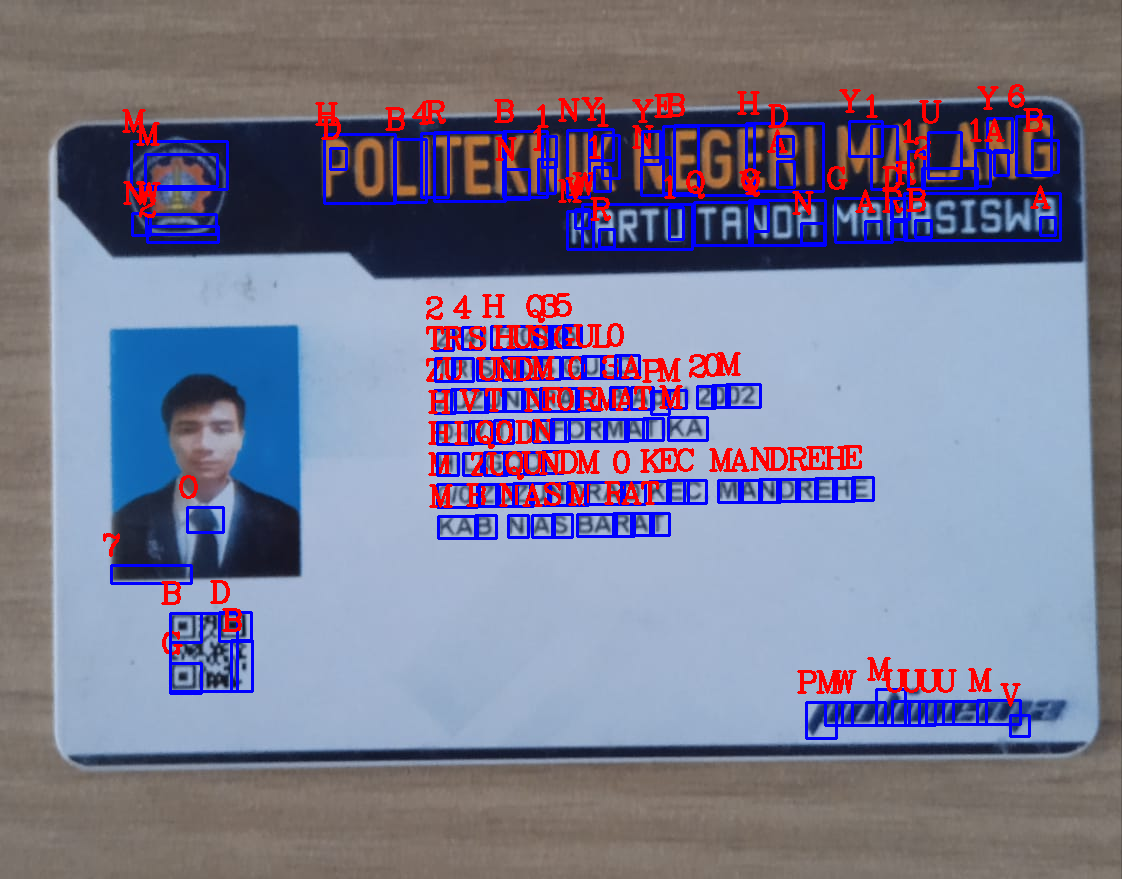

In [126]:
# Show char with actual image
img_copy3 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy3, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy3, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy3)